In [1]:
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use('default')
import plotly.express as px
import seaborn as sb
sb.set_style('darkgrid')
sb.set(rc={'figure.figsize': (15, 7)})
plt.rcParams['figure.figsize'] = (15, 7)
import numpy as np

In [2]:
print("The total no. of datasets are: ", len(datasets.__all__))
print('\n'.join(datasets.__all__))

The total no. of datasets are:  46
clear_data_home
dump_svmlight_file
fetch_20newsgroups
fetch_20newsgroups_vectorized
fetch_lfw_pairs
fetch_lfw_people
fetch_olivetti_faces
fetch_species_distributions
fetch_california_housing
fetch_covtype
fetch_rcv1
fetch_kddcup99
fetch_openml
get_data_home
load_boston
load_diabetes
load_digits
load_files
load_iris
load_breast_cancer
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine
make_biclusters
make_blobs
make_circles
make_classification
make_checkerboard
make_friedman1
make_friedman2
make_friedman3
make_gaussian_quantiles
make_hastie_10_2
make_low_rank_matrix
make_moons
make_multilabel_classification
make_regression
make_s_curve
make_sparse_coded_signal
make_sparse_spd_matrix
make_sparse_uncorrelated
make_spd_matrix
make_swiss_roll


In [3]:
boston1 = pd.read_csv('D:\\PROGRAMMING\\Datasets\\Boston.csv')
boston1.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
##Dependent and independent variable
idv = boston1.loc[:, ['lstat', 'medv']]
idv.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [5]:
px.scatter(idv, "lstat", "medv", trendline='lowess', trendline_color_override="blue")

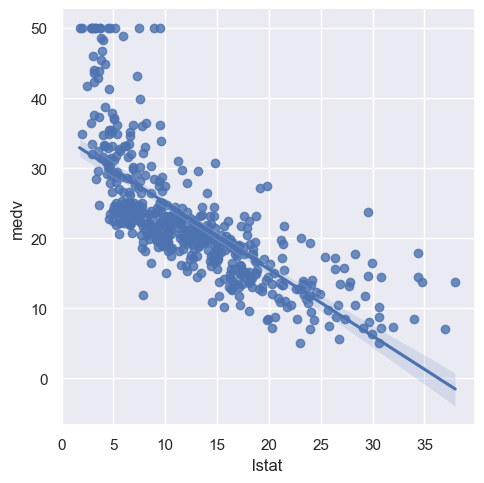

In [6]:
sb.lmplot(x = "lstat", y = "medv", data=boston1)
plt.show()

In [7]:
##Dividing the dataset into the independent and dependent variable
X = pd.DataFrame(boston1['lstat'])
y = pd.DataFrame(boston1['medv'])


In [8]:
##Splitting into train test model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
##Shape of test and train datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [10]:
## Training the algorithm
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [11]:
##Print the intercept
print(model.intercept_)

[34.28829623]


In [12]:
print(model.coef_)

[[-0.95166542]]


In [13]:
y_pred = model.predict(X_test)

res = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predicted':y_pred.flatten()})
res.head()

,Actual,Predicted
0,23.3,27.255489
1,14.2,19.347149
2,27.5,15.464354
3,20.3,19.213916
4,18.8,18.861800


In [14]:
px.scatter(res, 'Actual', 'Predicted', trendline='ols', trendline_color_override='blue')

In [15]:
## Calculating the residual sum of squares
res['residuals'] = res['Actual']-res['Predicted']
rss = np.sum(res['residuals']**2)
rss


4724.599928754196

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("mean_absolute_error is: ", mae)
print("mean_squared_error is : ", mse)

mean_absolute_error is:  4.6564692479452034
mean_squared_error is :  46.319607144648984
